In [ ]:
# add the directory to the path, if not already added
import sys
import os
path_to_add = "/Users/vikra/Downloads/dryrun"  # Replace with the path to your directory
# Ensure the path is absolute
path_to_add = os.path.abspath(path_to_add)
if path_to_add not in sys.path:
  sys.path.append(path_to_add)

# main
import numpy as np
import numpy.linalg as la
import conjgrad
print(dir(conjgrad)) 

rPara=np.array([ [1e-14],      #rPara(1)=10^(-14)=eps
        [1e-9],       #rPara(2)=10^(-9)=epsPivot used in matrix factorization
        [1e-9],       #rPara(3)=10^(-6)=epsSD   10^(-3) is not good
        [0.5*1e-3],   #rPara(4)=0.5*10^(-3), MS9/9/19 relative error of f-value
        [1e-9],       # used in MiniQuadFunUnconstAdapt1.m and MiniQuadFunUnconstAdapt3 , if -df < rPara(5)*|fx0| , not acceptable progress
        [0.5],        # used in MiniQuadFunUnconstAdapt2.m  , if  -gdx*rPara(6) > -df , not acceptable progress  
        [1e18],       # maxDx, max value allowed for a step size in uSD,uPT,uCD
        [1e5],        #rparaFac0=1e+5, since 8/16/23
        [1e-1],       #iparaFac0=1e-1
] )   

iPara=np.array([  [0],        # iPara(1)=option used in LDLtOfSymMatrix21.m  for prearrangement
        [500],       # iPara(2)=max # of iterations for S-D alg
        [0],         # iPara(3)= MS:9/8/19 toDebug
        [21],        # iPara(4)= MS:9/9/19   #-1 is max length of printed out vector/matrix
        [3],         # iPara(5)=0 means use full recursion, iPara(5)=1 means use 1-recursion + steepest descent to solve instead of full recursion
        [0],         # iPara(6)=1 means use SD2 in the framework of v41
        [0],         # iPara(7)= MS:9/15/19 as option to pre-permutation of variables based on domain size
        [1],         # iPara(8)= MS:10/20/19 as option to check suff cond of optimality for earlier exit (1=y, 0=n)
        [0],         # iPara(9)= MS:10/31/19 as option to use 0=LDU (original/default), 1=QDQ' ([Q,D]=eig(A); Q=o.n. e.v. for symmetric case, enough!)
        [0],         # iPara(10)=MS:10/31/19 as option to use different choices of Xstart[]/Ystart[]: 0=Box(original/default), 1=space-Box(hybrid)
        [5],         # iPara(11)=VS:11/7/19, select bdy face 0=original, 1,2,3 for 3 versions of min dist from a line, 4 for min dist from a face approach 11/20
        [0],         # iPara(12)=tie breaker flag to select only one bdy face.
        [0],         # iPara(13)=as a flag controlling a pre-search procedure! It applies to: Sd,AllSd,PsdSd,
] )                

# Example matrix (symmetric for real eigenvalues and eigenvectors)
n=3
A = np.array([[4, 1, -2],          # hessian
                   [1, 2, -1],
                   [-2, -1, 1]])
d = np.array([1, 2, 3])    # linear term
d=d.reshape(-1,1)
x = np.zeros((n,1)) # starting point
#x=np.zeros(n)
diagInv=1/np.diag(A)

# Perform spectral decomposition
diagD, Qmat = la.eigh(A)  # diagD is a vector of eigenvalues in ascending order
                               # Qmat is orthonormal matrix of corresponding eigenvectors
S={}   # create an empty dictionary
neig=sum(diagD>rPara[1])       # S['nNonZeroEig']=sum(diagD>rPara[1])
#print(diagD),print(Qmat[:,-2:])
Q=Qmat[:,n-neig:]                              # S['Q']=Qmat[:,n-S['nNonZeroEig']:]
D=diagD[n-neig:]           # S['D']=diagD[n-S['nNonZeroEig']:]
D=D.reshape(-1,1)
invD=np.array(diagInv[n-neig:])                  #S['diagInv']=np.array(diagInv[n-S['nNonZeroEig']:])

print(Q)  
print(D)
print(neig)
print(invD)

isSoftStop=1
isTF=0
targetF=0
epsx, maxDx, epsg, nMax =rPara[1], rPara[6], rPara[2], iPara[1]

isNew, xnew, fxnew, niters, idExit=conjgrad.cg(n,A,d,Q,D,neig,x,epsx,maxDx,epsg,nMax,isSoftStop,isTF,targetF)
print("isNew:",isNew)
print("xnew:",xnew)
print("fxnew:",fxnew)
print("niters:",niters)
print("idExit:",idExit)
print("xols:" ,-(np.linalg.inv(A)@d))

Next we are building ibbef

In [1]:
# add the directory to the path, if not already added
import sys
import os
path_to_add = "/Users/vikra/Downloads/dryrun"  # Replace with the path to your directory
# Ensure the path is absolute
path_to_add = os.path.abspath(path_to_add)
if path_to_add not in sys.path:
  sys.path.append(path_to_add)

# main
import numpy as np
from scipy import linalg
import time

import ibbef 
import conjgrad
import mio 

rPara=np.array([ [1e-14],      #rPara(1)=10^(-14)=eps
        [1e-9],       #rPara(2)=10^(-9)=epsPivot used in matrix factorization
        [1e-9],       #rPara(3)=10^(-6)=epsSD   10^(-3) is not good
        [0.5*1e-3],   #rPara(4)=0.5*10^(-3), MS9/9/19 relative error of f-value
        [1e-9],       # used in MiniQuadFunUnconstAdapt1.m and MiniQuadFunUnconstAdapt3 , if -df < rPara(5)*|fx0| , not acceptable progress
        [0.5],        # used in MiniQuadFunUnconstAdapt2.m  , if  -gdx*rPara(6) > -df , not acceptable progress  
        [1e18],       # maxDx, max value allowed for a step size in uSD,uPT,uCD
        [1e5],        #rparaFac0=1e+5, since 8/16/23
        [1e-1],       #iparaFac0=1e-1
] )   

iPara=np.array([  [0],        # iPara(1)=option used in LDLtOfSymMatrix21.m  for prearrangement
        [500],       # iPara(2)=max # of iterations for S-D alg
        [0],         # iPara(3)= MS:9/8/19 toDebug
        [21],        # iPara(4)= MS:9/9/19   #-1 is max length of printed out vector/matrix
        [3],         # iPara(5)=0 means use full recursion, iPara(5)=1 means use 1-recursion + steepest descent to solve instead of full recursion
        [0],         # iPara(6)=1 means use SD2 in the framework of v41
        [0],         # iPara(7)= MS:9/15/19 as option to pre-permutation of variables based on domain size
        [1],         # iPara(8)= MS:10/20/19 as option to check suff cond of optimality for earlier exit (1=y, 0=n)
        [0],         # iPara(9)= MS:10/31/19 as option to use 0=LDU (original/default), 1=QDQ' ([Q,D]=eig(A); Q=o.n. e.v. for symmetric case, enough!)
        [0],         # iPara(10)=MS:10/31/19 as option to use different choices of Xstart[]/Ystart[]: 0=Box(original/default), 1=space-Box(hybrid)
        [5],         # iPara(11)=VS:11/7/19, select bdy face 0=original, 1,2,3 for 3 versions of min dist from a line, 4 for min dist from a face approach 11/20
        [0],         # iPara(12)=tie breaker flag to select only one bdy face.
        [0],         # iPara(13)=as a flag controlling a pre-search procedure! It applies to: Sd,AllSd,PsdSd,
] )                

p=7
n=4
k=2
niter=1
for i in range(niter):
    mu=np.zeros(p)
    sigma=np.eye(p)
    seed=np.random.seed(i)
    X = np.random.multivariate_normal(mu, sigma,n )
    colmeans=np.mean(X,axis=0)  # find the mean of each column
    #X= X - colmeans             # make the column mean zero
    colnorms = np.linalg.norm(X, axis=0, keepdims=True) # find 2-norm of each col
    #X = X / colnorms 
    b0 = np.random.randint(-2,2,p)
    b0 = np.reshape(b0, (-1,1)) # make it a col array
    e = np.random.normal(size=n)
    e = np.reshape(e,(-1,1))  # make it a col array
    y = X @ b0 + e
    y = np.reshape(y, (-1,1))  # make it a col array
    A = 2*(X.T @ X)
    b = -2*(X.T @ y)
    c = y.T @ y

    diagInv=1/np.diag(A)

    # Perform spectral decomposition
    diagD, Qmat = linalg.eigh(A)  # diagD is a vector of eigenvalues in ascending order
                               # Qmat is orthonormal matrix of corresponding eigenvectors
    S={}   # create an empty dictionary
    neig=sum(diagD>rPara[1])       # S['nNonZeroEig']=sum(diagD>rPara[1])
    #print(diagD),print(Qmat[:,-2:])
    Q=Qmat[:,p-neig:]                              # S['Q']=Qmat[:,n-S['nNonZeroEig']:]
    D=diagD[p-neig:]           # S['D']=diagD[n-S['nNonZeroEig']:]
    D=D.reshape(-1,1)
    invD=np.array(diagInv[p-neig:])                  #S['diagInv']=np.array(diagInv[n-S['nNonZeroEig']:])

    #elt=Q@(D*Q.T)==A
    #print(elt)
    #print(Q@(D*Q.T))
    #print(A)
      

    #print(Q)  
    #print(D)
    print('neig:',neig)
    #print(invD)

    isSoftStop=1
    isTF=0
    targetF=0
    epsx, maxDx, epsg, nMax =rPara[1], rPara[6], rPara[2], iPara[1]

    R, ipiv0 = linalg.qr(A, mode='r', pivoting=True)
    diagR=np.abs(np.diag(R))

    #print("Q:",Q)
    #print("R:",R)
    #print("P:",ipiv0)
    #print("diagR:",diagR)
    x0=np.ones((p,1))
    #print('X,e,y,b0:',X,e,y,b0)
    #xols=-(np.linalg.inv(A)@b)
    #print("xols:" ,xols)
    #print('fxols:',0.5*(xols.T@A@xols)+b.T@xols+c)
    #print('fxols:',b.T@xols)
    isNew, xnew, fxnew, niters, idExit=conjgrad.cg(p,A,b,Q,D,neig,x0,epsx,maxDx,epsg,nMax,isSoftStop,isTF,targetF)
    #print("isNew:",isNew)
    print("xnew:",xnew)
    print("fxnew:",fxnew+c)
    #print("niters:",niters)
    #print("idExit:",idExit)2
    tstart1=time.process_time()
    xibbef, fibbef=ibbef.main(p,n,y,X,A,b,c,k,xnew)
    tend1=time.process_time()
    print('start, end:',tstart1,tend1)
    cputime1=tend1-tstart1
    print('xibbef:',xibbef)
    print('fibbef:',fibbef)
    print('cpu ibbef:',cputime1)
    low=-4*np.ones((p,1))
    up=4*np.ones((p,1))
    tstart2=time.process_time()
    xmio, fmio = mio.main(p,n,y,X,A,b,c,k,low,up,x0)
    tend2=time.process_time()
    cputime2=tend2-tstart2
    print('xmio:',xmio)
    print('fmio:',fmio)
    print('cpu mio:',cputime2)
    

neig: 4
xnew: [[ 1.02083291]
 [ 0.24438927]
 [ 1.18150517]
 [-1.90623733]
 [-0.6303569 ]
 [-1.5012267 ]
 [ 1.01239525]]
fxnew: [[1.0658141e-14]]
npiv0, npiv00: 4 4
E0: [[ 1.          0.10054438  0.21936586 -0.17596986  0.52008837  0.27113932
   0.02553052 -0.85600927]
 [ 0.          1.          0.15539904 -0.11296078  0.22398251 -0.10821419
   0.51162105  0.50323333]
 [ 0.          0.          1.          0.27483878 -0.15228374 -0.16567811
  -0.4956394  -0.18174679]
 [ 0.          0.          0.          1.         -0.57733607 -0.00873879
  -0.40167536 -2.56730755]]
supp1: [0 1 2 3 4 5 6]
local_supp: [5 3]
supp1: [0 1 2 3 4 5 6]
local_supp: [5 3]
supp1: [0 1 2 3 4 5 6]
local_supp: [5 3]
supp1: [0 1 2 3 4 5 6]
local_supp: [5 3]
supp1: [0 1 2 3 4 5 6]
local_supp: [5 3]
supp1: [0 1 2 3 4 5 6]
local_supp: [5 3]
supp1: [0 1 2 3 4 5 6]
local_supp: [5 3]
supp1: [0 1 2 3 4 5 6]
local_supp: [5 3]
supp1: [0 1 2 3 4 5 6]
local_supp: [5 3]
alg. converged
start, end: 1.71875 1.8125
xibbef: [[ 0.   

In [1]:
#!/usr/bin/env python3.11

# Copyright 2025, Gurobi Optimization, LLC

# This example formulates and solves the following simple QP model:
#
#    minimize    x + y + x^2 + x*y + y^2 + y*z + z^2
#    subject to  x + 2 y + 3 z >= 4
#                x +   y       >= 1
#                x, y, z non-negative
#
# The example illustrates the use of dense matrices to store A and Q
# (and dense vectors for the other relevant data).  We don't recommend
# that you use dense matrices, but this example may be helpful if you
# already have your data in this format.

import sys
import gurobipy as gp
from gurobipy import GRB


def dense_optimize(rows, cols, c, Q, A, sense, rhs, lb, ub, vtype, solution):
    model = gp.Model()

    # Add variables to model
    vars = []
    for j in range(cols):
        vars.append(model.addVar(lb=lb[j], ub=ub[j], vtype=vtype[j]))

    # Populate A matrix
    for i in range(rows):
        expr = gp.LinExpr()
        for j in range(cols):
            if A[i][j] != 0:
                expr += A[i][j] * vars[j]
        model.addLConstr(expr, sense[i], rhs[i])

    # Populate objective
    obj = gp.QuadExpr()
    for i in range(cols):
        for j in range(cols):
            print('Qij:',Q[i][j])
            if Q[i][j] != 0:
                obj += Q[i][j] * vars[i] * vars[j]
    for j in range(cols):
        if c[j] != 0:
            obj += c[j] * vars[j]

    print('obj:',obj)        
    model.setObjective(obj)

    # Solve
    model.optimize()

    # Write model to a file
    model.write("dense.lp")

    if model.status == GRB.OPTIMAL:
        x = model.getAttr("X", vars)
        for i in range(cols):
            solution[i] = x[i]
        return True
    else:
        return False


# Put model data into dense matrices

c = [1, 1, 0]
Q = [[1, 1, 0], [0, 1, 1], [0, 0, 1]]
A = [[1, 2, 3], [1, 1, 0]]
sense = [GRB.GREATER_EQUAL, GRB.GREATER_EQUAL]
rhs = [4, 1]
lb = [0, 0, 0]
ub = [GRB.INFINITY, GRB.INFINITY, GRB.INFINITY]
vtype = [GRB.CONTINUOUS, GRB.CONTINUOUS, GRB.CONTINUOUS]
sol = [0] * 3

# Optimize

success = dense_optimize(2, 3, c, Q, A, sense, rhs, lb, ub, vtype, sol)

if success:
    print(f"x: {sol[0]:g}, y: {sol[1]:g}, z: {sol[2]:g}")

Set parameter Username
Set parameter LicenseID to value 2631835
Academic license - for non-commercial use only - expires 2026-03-06
Qij: 1
Qij: 1
Qij: 0
Qij: 0
Qij: 1
Qij: 1
Qij: 0
Qij: 0
Qij: 1
obj: <gurobi.Var *Awaiting Model Update*> + <gurobi.Var *Awaiting Model Update*> + [ <gurobi.Var *Awaiting Model Update*> ^ 2 + <gurobi.Var *Awaiting Model Update*> * <gurobi.Var *Awaiting Model Update*> + <gurobi.Var *Awaiting Model Update*> ^ 2 + <gurobi.Var *Awaiting Model Update*> * <gurobi.Var *Awaiting Model Update*> + <gurobi.Var *Awaiting Model Update*> ^ 2 ]
Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (mac64[arm] - Darwin 24.3.0 24D81)

CPU model: Apple M3
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2 rows, 3 columns and 5 nonzeros
Model fingerprint: 0xeb7297b5
Model has 5 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 3e+00]
  Objective range  [1e+00, 1e+00]
  QObjective range [2e+00, 2e+00]
  Bo

In [3]:
import numpy as np
import gurobipy as gp
#a=np.ones(5,dtype=np.int32)
a=np.array([[3, 5, 4, 7, 11, 1],
            [4, 12, 7, 3, 2, 9]])
print(a[:,5])
b=np.array([2, 5, 3, -7, 4])
b=np.reshape(b,(-1,1))
print('b:',2*np.abs(b).max())

[1 9]
b: 14


[[0. 0. 0.]]
[[1.01 0.99 1.2 ]]
(1, 3) [[ 2.02020202  0.         21.21212121]]
[1 2 3]
[2.02020202]
[0.]
[21.21212121]


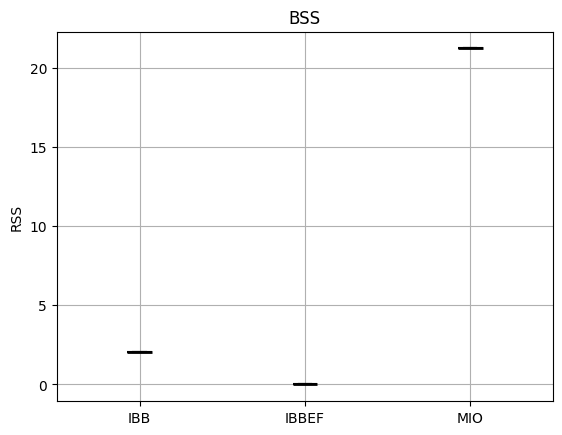

In [ ]:
import numpy as np
import gurobipy as gp
from gurobipy import GRB
import pandas as pd
import sys
import os

# go up one level to reach the parent folder
sys.path.append(os.path.abspath(".."))

from utility import boxplot as boxplot
from utility import relgap as relgap

rss=np.zeros((2,3))
print(rss)
rss[0,0]=1.01
rss[0,1]=0.99
rss[0,2]=1.2
rss[1,0]=1.11
rss[1,1]=1.99
rss[1,2]=1.25
print(rss)
rss1=rss
# create box plots
boxplot.main(relgap.main(rss1))
